In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

In [ ]:
wine_white_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
wine_red_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_white = pd.read_csv(wine_white_link, delimiter=';')
wine_red = pd.read_csv(wine_red_link, delimiter=';')
print(wine_white.columns)
print(wine_red.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
wine_white['wine type'] = 'white'
wine_red['wine type'] = 'red'

In [ ]:
_dataset = wine_white.append(wine_red)

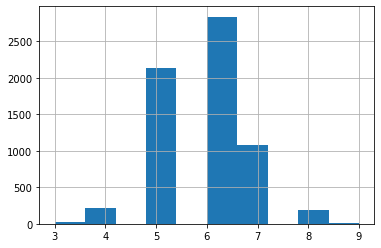

In [ ]:
_dataset['quality'].hist()

In [ ]:
_dataset = _dataset[(_dataset['quality'] > 4) & (_dataset['quality'] < 8)]

In [ ]:
_target = _dataset[['wine type', 'quality']]
_dataset = _dataset[_dataset.columns.drop(['wine type', 'quality'])]

In [ ]:
from sklearn.preprocessing import Normalizer
_dataset = Normalizer().fit_transform(_dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(_dataset, _target, shuffle=True, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, shuffle=True)

In [ ]:
wine_type_train = Y_train.pop('wine type').to_numpy()
quality_train = Y_train.to_numpy()
wine_type_test = Y_test.pop('wine type').to_numpy()
quality_test = Y_test.to_numpy()
wine_type_val = Y_val.pop('wine type').to_numpy()
quality_val = Y_val.to_numpy()
print(wine_type_train.shape)

(3873,)


(array([1347.,    0.,    0.,    0.,    0., 1847.,    0.,    0.,    0.,
         679.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <a list of 10 Patch objects>)

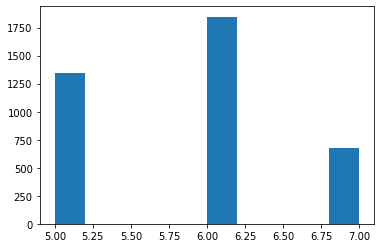

In [ ]:
import matplotlib.pyplot as plt
plt.hist(quality_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
quality_label_encoder = LabelEncoder()
quality_train = quality_label_encoder.fit_transform(quality_train)
quality_test = quality_label_encoder.fit_transform(quality_test)
quality_val = quality_label_encoder.fit_transform(quality_val)

quality_encoder = tf.keras.layers.CategoryEncoding(num_tokens=np.unique(quality_train).max() + 1, output_mode='one_hot')
quality_train = quality_encoder(quality_train)
quality_test = quality_encoder(quality_test)
quality_val = quality_encoder(quality_val)
print(quality_train.shape)

(3873, 3)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
wine_label_encoder = LabelEncoder()
wine_type_train = wine_label_encoder.fit_transform(wine_type_train)
wine_type_test = wine_label_encoder.fit_transform(wine_type_test)
wine_type_val = wine_label_encoder.fit_transform(wine_type_val)
wine_type_encoder = tf.keras.layers.CategoryEncoding(num_tokens = np.unique(wine_type_train).max() + 1, output_mode = 'one_hot')
wine_type_train = wine_type_encoder(wine_type_train)
wine_type_test = wine_type_encoder(wine_type_test)
wine_type_val = wine_type_encoder(wine_type_val)

print(wine_type_train.shape)

(3873, 2)


## Model Creation

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

_inputs = Input((11, ))
dense_1 = Dense(units = 128, activation = 'relu', name = 'base_input_1')(_inputs)
dense_2 = Dense(units = 128, activation = 'relu', name = 'base_input_2')(dense_1)
wine_quality = Dense(units = 3, name = 'wine_quality')(dense_2)
wine_type = Dense(units = 2, activation = 'sigmoid', name = 'wine_type')(dense_2)
model = Model(inputs = _inputs, outputs = [wine_quality, wine_type])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(), loss = {'wine_quality': 'mean_squared_error', 'wine_type': 'binary_crossentropy'}, metrics={'wine_quality': tf.keras.metrics.RootMeanSquaredError(), 'wine_type': 'accuracy'})

In [ ]:
history = model.fit(x = X_train, y = (quality_train, wine_type_train), epochs=40, validation_data=(X_val, (quality_val, wine_type_val)) )

Epoch 1/40
122/122 [==============================] - 2s 7ms/step - loss: 0.6885 - wine_quality_loss: 0.2135 - wine_type_loss: 0.4750 - wine_quality_root_mean_squared_error: 0.4621 - wine_type_accuracy: 0.8120 - val_loss: 0.4775 - val_wine_quality_loss: 0.2129 - val_wine_type_loss: 0.2646 - val_wine_quality_root_mean_squared_error: 0.4614 - val_wine_type_accuracy: 0.9061
Epoch 2/40
122/122 [==============================] - 1s 8ms/step - loss: 0.4497 - wine_quality_loss: 0.2069 - wine_type_loss: 0.2428 - wine_quality_root_mean_squared_error: 0.4549 - wine_type_accuracy: 0.9218 - val_loss: 0.4084 - val_wine_quality_loss: 0.2113 - val_wine_type_loss: 0.1971 - val_wine_quality_root_mean_squared_error: 0.4597 - val_wine_type_accuracy: 0.9381
Epoch 3/40
122/122 [==============================] - 1s 11ms/step - loss: 0.4238 - wine_quality_loss: 0.2050 - wine_type_loss: 0.2188 - wine_quality_root_mean_squared_error: 0.4528 - wine_type_accuracy: 0.9264 - val_loss: 0.3957 - val_wine_quality_los

In [ ]:
predictions = model.predict(X_test)
quality_preditions = predictions[0]
type_prediction = predictions[1]

38/38 [==============================] - 0s 2ms/step


In [ ]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    # plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

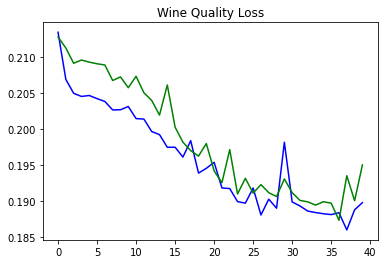

In [ ]:
plot_metrics('wine_quality_loss', 'Wine Quality Loss', ylim=0.2)

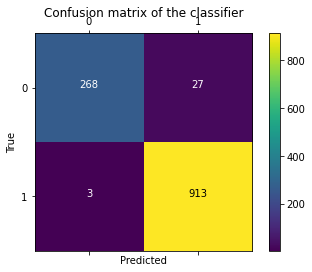

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(np.array(wine_type_test).argmax(axis = 1), type_prediction.argmax(axis = 1))